## UBER PICKUPS IN NYC

In this project, we are going to analyse the Uber Pickups in New York City. 

### ABOUT THE DATASET

The dataset provided contains data on over 4.5 million Uber pickups in New York City from April to September 2014, and 14.3 million more Uber pickups from January to June 2015.

#### Uber trip data from 2014

There are six files of raw data on Uber pickups in New York City from April to September 2014. The files are separated by month and each has the following columns:
* **Date/Time** : The date and time of the Uber pickup
* **Lat** : The latitude of the Uber pickup
* **Lon** : The longitude of the Uber pickup
* **Base** : The TLC (Taxi & Limousine Commission) base company code affiliated with the Uber pickup

These files are named:

* `uber-raw-data-apr14.csv`
* `uber-raw-data-aug14.csv`
* `uber-raw-data-jul14.csv`
* `uber-raw-data-jun14.csv`
* `uber-raw-data-may14.csv`
* `uber-raw-data-sep14.csv`

For the Current Analysis we are considering the Data for the **Month of July 2014**.

#### Uber trip data from 2015

Also included is the `file uber-raw-data-janjune-15.csv`. This file has the following columns:

* **Dispatching_base_num** : The TLC base company code of the base that dispatched the Uber
* **Pickup_date** : The date and time of the Uber pickup
* **Affiliated_base_num** : The TLC base company code affiliated with the Uber pickup
* **locationID** : The pickup location ID affiliated with the Uber pickup

The `base` codes are for the following Uber bases (In the parentheses, we have code names in German which are used internally by Uber to categorize and manage their various service offerings.) :

* **B02512 (Unter):** This corresponds to the Uber service category "UberX", which is the basic and most common service offering.
* **B02598 (Hinter):** This corresponds to the Uber service category "UberPOOL", which allows riders heading in the same direction to share a ride and split the cost.
* **B02617 (Weiter):** This corresponds to the Uber service category "UberXL", which offers larger vehicles such as SUVs and minivans for accommodating more passengers.
* **B02682 (Schmecken):** This corresponds to the Uber service category "UberSELECT", which provides premium rides with high-end vehicles.
* **B02764 (Danach-NY):** This corresponds to the Uber service category "UberWAV", which offers wheelchair-accessible vehicles for riders with accessibility needs.
* **B02765 (Grun):** This corresponds to the Uber service category "UberBLACK", which provides luxury black car services with professional drivers.
* **B02835 (Dreist):** This corresponds to the Uber service category "UberSUV", which offers larger luxury vehicles for accommodating more passengers.
* **B02836 (Drinnen):** This corresponds to the Uber service category "UberLUX", which provides high-end luxury vehicles for a premium ride experience.

<hr>

### 0. Meeting the library requirements

In Jupyter Notebooks, you may encounter situations where you want to suppress warning messages that would normally be displayed. The `warnings` module in Python provides a way to control warning behavior in your code. By calling `filterwarnings('ignore')`, you instruct Python to ignore all warnings and not display them in the output. 

This can be useful in certain situations where you want to suppress warnings that might be irrelevant or distracting for your specific task. However, it's important to note that ignoring warnings globally can sometimes hide important information about potential issues or bugs in your code. It's generally recommended to use caution when suppressing warnings and consider whether it's necessary for your particular use case.

In [1]:
import warnings
warnings.filterwarnings('ignore')

Run the following cell to install the required libraries. Let's break down the command and its components:

* `!`: The exclamation mark (!) at the beginning of the line indicates that the command should be executed as a shell command, rather than as a Python statement.
* `pip3`: pip3 is a package installer for Python 3, used to install Python packages from the Python Package Index (PyPI).
* `-q`: The -q flag stands for "quiet" and is used to suppress output or progress messages during the installation process. It makes the installation process less verbose.
* `install:` This keyword tells pip3 that you want to install packages.
* `numpy pandas matplotlib seaborn  datetime scipy sklearn`: These are the names of the packages you want to install.

In [6]:
!pip3  install numpy pandas matplotlib seaborn datetime

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/2e/51/c77a14869b7eb9d6fb440e811b754fc3950d6868c38ace57d0632b674415/matplotlib-3.8.2-cp312-cp312-win_amd64.whl.metadata
  Using cached matplotlib-3.8.2-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for datetime from https://files.pythonhosted.org/packages/ff/d5/f508192a563ab7415d1efbbe8d39cb9f0e510a1f6aaee3ca7d4ffed2a194/DateTime-5.4-py3-none-any.whl.metadata
  Using cached DateTime-5.4-py3-none-any.whl.metadata (33 kB)
Using cached matplotlib-3.8.2-cp312-cp312-win_amd64.whl (7.6 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached DateTime-5.4-py3-none-any.whl (52 kB)



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# Importing the libraries installed

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from math import radians,cos,sin,asin,sqrt

import datetime
from scipy.stats import ttest_ind

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

### 1. Loading the data

Let's pick up the 2014 data for our analysis. We can see that there are 6 files for that. Out of which, we will pick `uber-raw-data-jul14.csv` to begin with.

In [8]:
uber_data = pd.read_csv('./data/uber-raw-data-jul14.csv')

In [9]:
# Print the first 10 elements
display(uber_data.head(10))

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512
5,7/1/2014 0:35:00,40.7487,-73.9869,B02512
6,7/1/2014 0:57:00,40.7444,-73.9961,B02512
7,7/1/2014 0:58:00,40.7132,-73.9492,B02512
8,7/1/2014 1:04:00,40.7590,-73.9730,B02512
9,7/1/2014 1:08:00,40.7601,-73.9823,B02512


### 2. Pre-processing the data

Let's first see the information about the dataframe. 

In [10]:
print(uber_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796121 entries, 0 to 796120
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  796121 non-null  object 
 1   Lat        796121 non-null  float64
 2   Lon        796121 non-null  float64
 3   Base       796121 non-null  object 
dtypes: float64(2), object(2)
memory usage: 24.3+ MB
None


#### 1. Change the type of the data in a column

Column `Date/Time` shows the data type as object. To find which object is that, we print the type of data in the first cell of the `Date/Time` column. On doing that, we come to know - it's of string type.

In [11]:
# Print the type of data in Date/Time 
print(type(uber_data.loc[0,'Date/Time']))

<class 'str'>


Let's convert it to datetime format for easy indexing. 

* `pd.to_datetime():` This is a pandas function that converts a given input into a datetime object. It is used here to convert the values of the 'Date/Time' column to datetime format.

In [12]:
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'])

#### 2. Dividing the data in bins

Let us divide each hour in existing Date/Time column into four smaller bins of 15 mins each: [0 mins - 15 mins], [15 mins - 30 mins], [30 mins - 45 mins] and [45 mins - 60 mins]. The purpose of binning the time values in this way could be to aggregate or group the data based on time intervals, allowing for analysis at a coarser level of granularity. This can be useful when analyzing patterns or trends that occur within specific time intervals. This will allow us to visualize the data more precisely.

* `uber_data['Date/Time']`: This accesses the 'Date/Time' column in the uber_data DataFrame.
* `.dt.floor('15min'):` This is a pandas datetime accessor (dt) method that performs floor division to round down the time values to the nearest 15-minute interval. The '15min' argument specifies the desired time interval.

In [13]:
# Create a new column to store this new binned column
uber_data['BinnedHour'] = uber_data['Date/Time'].dt.floor('15min')

In [14]:
# Printing the new column - BinnedHour
display(uber_data['BinnedHour'])

0        2014-07-01 00:00:00
1        2014-07-01 00:00:00
2        2014-07-01 00:00:00
3        2014-07-01 00:00:00
4        2014-07-01 00:15:00
                 ...        
796116   2014-07-31 23:15:00
796117   2014-07-31 23:15:00
796118   2014-07-31 23:15:00
796119   2014-07-31 23:30:00
796120   2014-07-31 23:45:00
Name: BinnedHour, Length: 796121, dtype: datetime64[ns]

### 3. Visualising the data

#### 1. Let us visualize the total uber rides per day in the month of July 2014

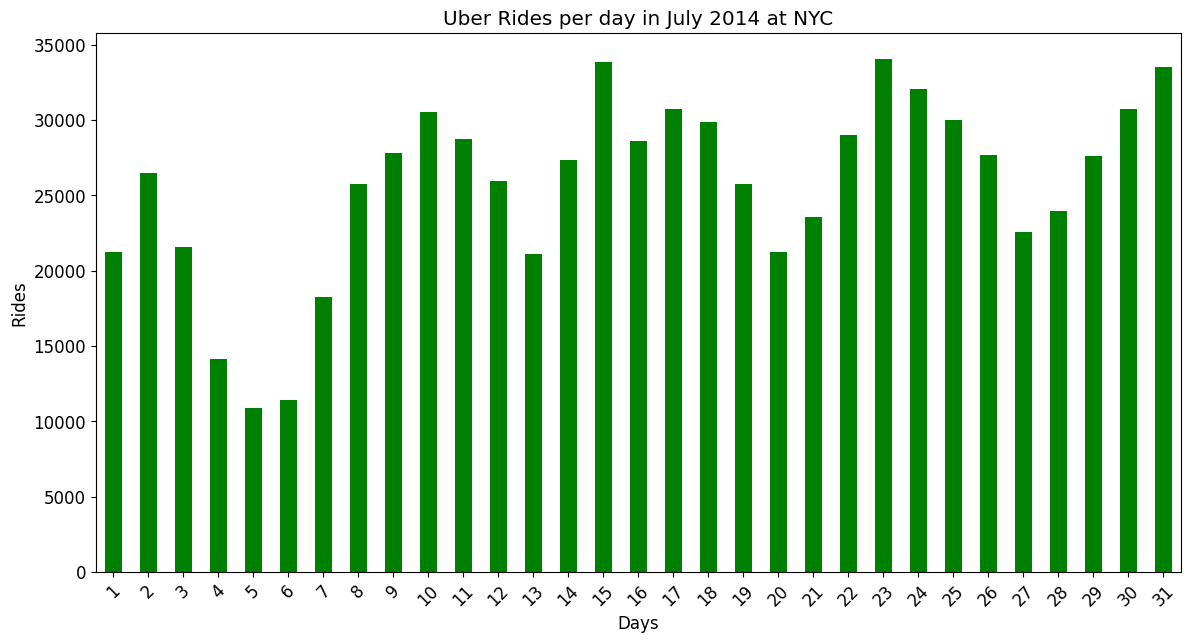

In [16]:
plt.figure(figsize=(14,7))
uber_data['BinnedHour'].dt.day.value_counts().sort_index().plot(kind='bar', color='green')
for item in plt.gca().get_xticklabels():
   item.set_rotation(45)
plt.title('Uber Rides per day in July 2014 at NYC')
plt.xlabel('Days')
plt.ylabel('Rides')
plt.show()

Let's understand what's happening here.

The first line, `plt.figure(figsize=(14,7))`, creates a new figure object with a specific size of 14 inches in width and 7 inches in height. This sets the dimensions of the plot that will be created.

The next line, `uber_data['BinnedHour'].dt.day.value_counts().sort_index().plot(kind='bar',color='green')`, generates the bar chart using the 'BinnedHour' column. It performs several operations in sequence:
* `.dt.day:` The .dt accessor allows access to datetime properties, and .day extracts the day component from the 'BinnedHour' column, considering the binned time values.
* `.value_counts():` This method counts the occurrences of each unique day in the 'BinnedHour' column, providing a count for the number of rides on each day.
* `.sort_index():` This sorts the index (day values) in ascending order.
* `.plot(kind='bar', color='green'):` This plots the sorted counts as a bar chart, with each bar representing a day. The kind='bar' parameter specifies the type of plot, and color='green' sets the color of the bars to green.

Then the lines `for item in plt.gca().get_xticklabels(): item.set_rotation(45)` rotate the x-axis tick labels by 45 degrees to improve readability. 

#### Observation 1: There is a recurring pattern in the data! The frequency of trips increases and then decreases in a repeating pattern. 

#### 2. Let us have a more closer look at it, say every 15 minutes from July 1 to July 31.

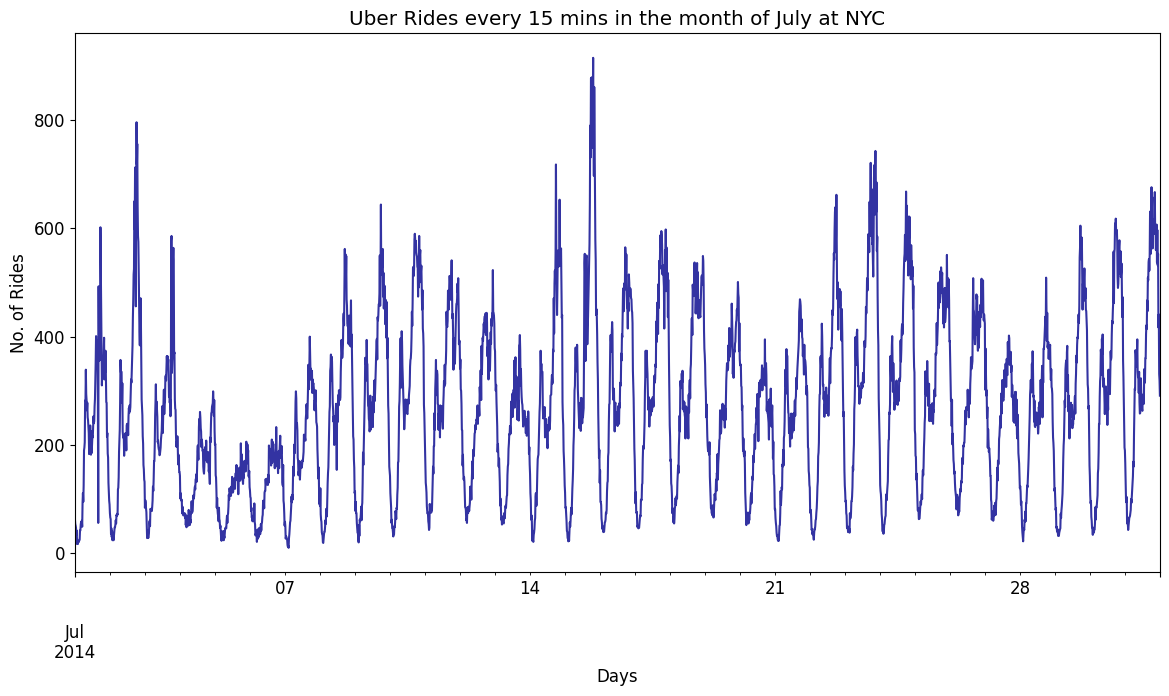

In [18]:
plt.figure(figsize=(14,7))
uber_data['BinnedHour'].value_counts().sort_index().plot(c='darkblue', alpha=0.8)
plt.title('Uber Rides every 15 mins in the month of July at NYC')
plt.xlabel('Days')
plt.ylabel('No. of Rides')
plt.show()

#### Observation 2: The underlying trend is clearly visible now. It conveys that in a day there are times when the pickups are very low and very high, and they seem to follow a pattern.

#### Q. Which times correspond to the highest and lowest peaks in the plot above?

In [19]:
display(uber_data['BinnedHour'].value_counts())

BinnedHour
2014-07-15 19:15:00    915
2014-07-15 18:15:00    879
2014-07-15 17:45:00    877
2014-07-15 18:00:00    872
2014-07-15 20:00:00    861
                      ... 
2014-07-01 02:00:00     17
2014-07-07 01:45:00     15
2014-07-07 02:15:00     14
2014-07-07 02:00:00     12
2014-07-07 02:30:00     10
Name: count, Length: 2976, dtype: int64

#### Ans. 

The highest peak corresponds to the time 19:15 (7:15 PM), 15th July 2014 and has a ride count of 915 and the lowest peak corresponds to the time 02:30, 7th July 2014 and has a ride count of 10.

#### 3. Lets visualize the week wise trends in the data. 

For this, we will have to map each date into its day name using a dictionary. 

In [20]:
# Defining a dictionary to map the weekday to day name
DayMap = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
uber_data['Day'] = uber_data['BinnedHour'].dt.weekday.map(DayMap)
display(uber_data['Day'])

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
796116    Thursday
796117    Thursday
796118    Thursday
796119    Thursday
796120    Thursday
Name: Day, Length: 796121, dtype: object

In [21]:
# Separating the date and time to other columns
uber_data['Date'] = uber_data['BinnedHour'].dt.date
uber_data['Time'] = uber_data['BinnedHour'].dt.time
display(uber_data[['Date', 'Time']])


,Date,Time
0,2014-07-01,00:00:00
1,2014-07-01,00:00:00
2,2014-07-01,00:00:00
3,2014-07-01,00:00:00
4,2014-07-01,00:15:00
...,...,...
796116,2014-07-31,23:15:00
796117,2014-07-31,23:15:00
796118,2014-07-31,23:15:00
796119,2014-07-31,23:30:00


In [22]:
# Defining ordered category of week days for easy sorting and visualization
uber_data['Day'] = pd.Categorical(uber_data['Day'], 
                                  categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                                  ordered=True)
display(uber_data['Day'])

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
796116    Thursday
796117    Thursday
796118    Thursday
796119    Thursday
796120    Thursday
Name: Day, Length: 796121, dtype: category
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

We now rearrange the dataset a bit for weekly analysis. 

In [23]:
weekly_data = uber_data.groupby(['Date','Day','Time']).count().dropna()\
                .rename(columns={'BinnedHour':'Rides'})['Rides'].reset_index()
weekly_data.head(10)

,Date,Day,Time,Rides
0,2014-07-01,Monday,00:00:00,0
1,2014-07-01,Monday,00:15:00,0
2,2014-07-01,Monday,00:30:00,0
3,2014-07-01,Monday,00:45:00,0
4,2014-07-01,Monday,01:00:00,0
5,2014-07-01,Monday,01:15:00,0
6,2014-07-01,Monday,01:30:00,0
7,2014-07-01,Monday,01:45:00,0
8,2014-07-01,Monday,02:00:00,0
9,2014-07-01,Monday,02:15:00,0


We now group weekly data by days to plot total rides per week in July 2014.

In [24]:
# Grouping the weekly_data daywise
daywise = weekly_data.groupby('Day')['Rides'].sum()
display(daywise)

Day
Monday        93189
Tuesday      137454
Wednesday    147717
Thursday     148439
Friday       102735
Saturday      90260
Sunday        76327
Name: Rides, dtype: int64

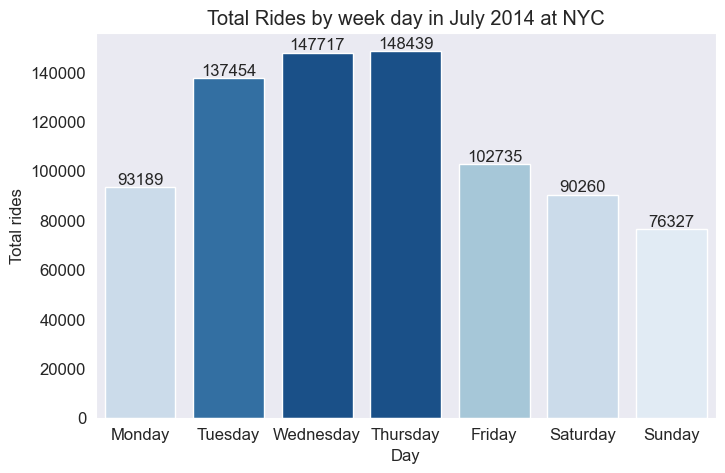

In [25]:
# Plotting the graphs for a better visualization
sns.set_style("dark")
plt.figure(figsize=(8,5))

# Creating a customized color palette for custom hue according to height of bars
vals = daywise.to_numpy().ravel()
normalized = (vals - np.min(vals)) / (np.max(vals) - np.min(vals))
indices = np.round(normalized * (len(vals) - 1)).astype(np.int32)
palette = sns.color_palette('Blues', len(vals))
colorPal = np.array(palette).take(indices, axis=0)

# Creating a bar plot
ax = sns.barplot(x = daywise.index,y= vals,palette=colorPal)
plt.ylabel('Total rides')
plt.title('Total Rides by week day in July 2014 at NYC')
for i, value in enumerate(daywise):
    plt.annotate(int(value), (i, value), ha='center', va='bottom')

#### Observation 3: According to the bar plot above, rides are maximum on Thursdays and minimum on Sundays. Sundays having the lowest number of rides makes sense logically, as it's a holiday and people often take rest on that day.

In [26]:
weekly_data = weekly_data.groupby(['Day','Time'])['Rides'].mean()
display(weekly_data.head(10))

Day     Time    
Monday  00:00:00    13.225806
        00:15:00    10.967742
        00:30:00     8.741935
        00:45:00     7.709677
        01:00:00     6.935484
        01:15:00     5.354839
        01:30:00     3.838710
        01:45:00     3.645161
        02:00:00     2.612903
        02:15:00     3.161290
Name: Rides, dtype: float64

In [27]:
# Unstacking the data to create heatmap
weekly_data= weekly_data.unstack(level=0)
display(weekly_data)

Day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Time,,,,,,,
00:00:00,13.225806,14.129032,18.096774,21.032258,24.677419,40.258065,36.709677
00:15:00,10.967742,13.290323,13.741935,17.645161,19.870968,38.419355,37.129032
00:30:00,8.741935,11.967742,14.387097,16.612903,19.096774,33.096774,34.903226
00:45:00,7.709677,9.290323,10.967742,14.064516,15.709677,31.483871,31.903226
01:00:00,6.935484,7.870968,10.129032,12.354839,15.483871,29.129032,31.322581
...,...,...,...,...,...,...,...
22:45:00,24.903226,37.741935,48.354839,64.064516,58.096774,50.258065,26.322581
23:00:00,22.225806,35.290323,41.258065,58.193548,56.129032,48.000000,21.258065
23:15:00,19.645161,28.096774,36.096774,47.516129,48.935484,45.032258,18.870968


Text(0.5, 1.0, 'Heatmap of average rides in time vs. day grid')

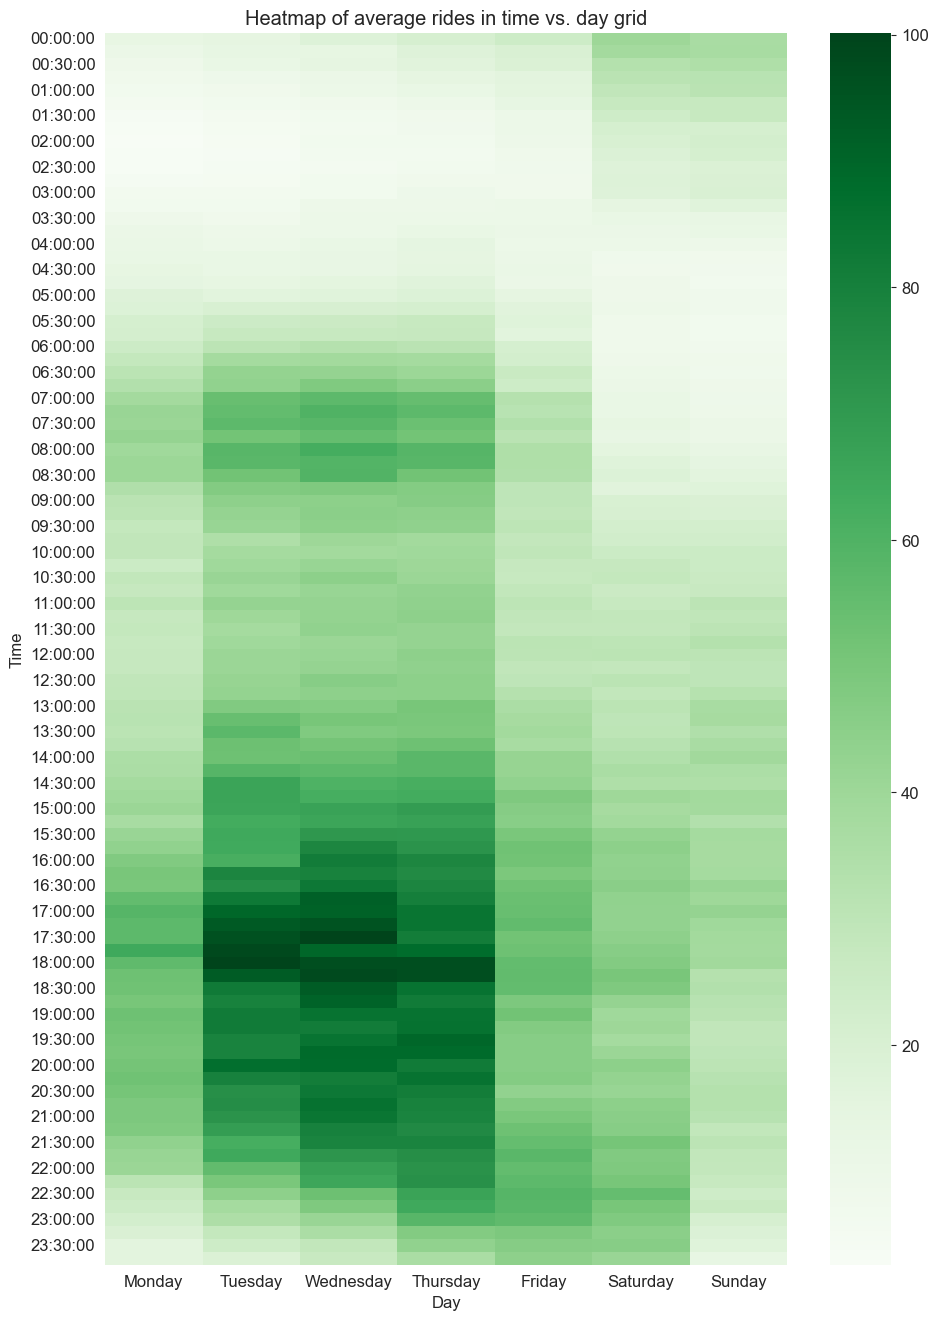

In [28]:
plt.figure(figsize=(11,16))
sns.heatmap(weekly_data, cmap='Greens')
plt.title('Heatmap of average rides in time vs. day grid')

Here's another way to look at it using line graphs.

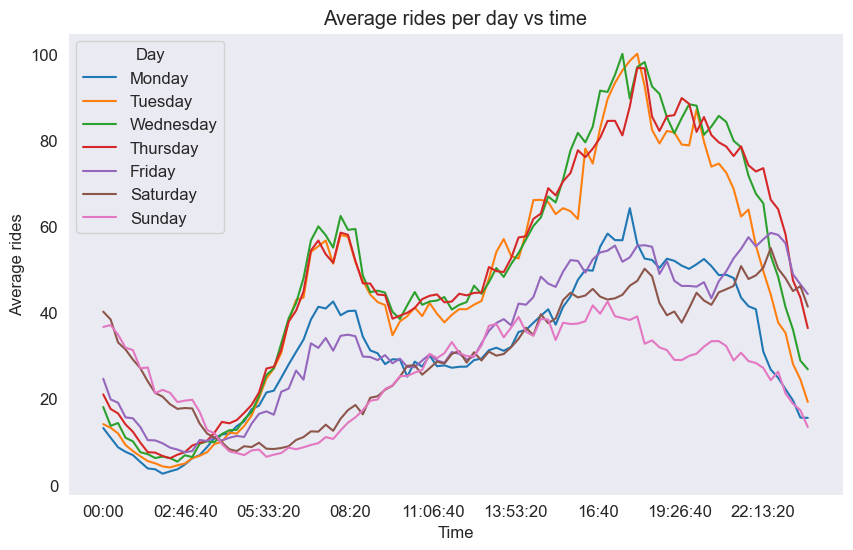

In [29]:
plt.figure(figsize=(10,6))
weekly_data.plot(ax=plt.gca())
plt.title('Average rides per day vs time')
plt.ylabel('Average rides')
plt.locator_params(axis='x', nbins=10)
plt.show()

We can also plot the average rides on any day as follows.

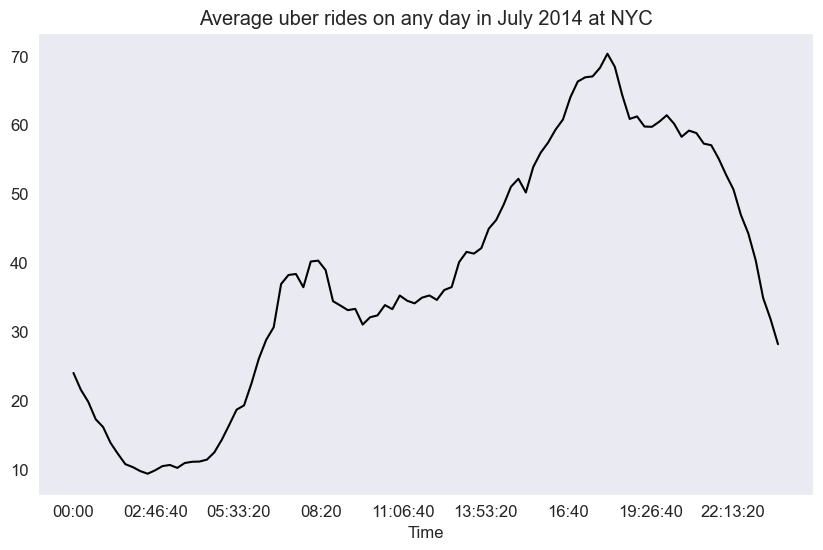

In [30]:
plt.figure(figsize=(10,6))
weekly_data.T.mean().plot(c = 'black')
plt.title('Average uber rides on any day in July 2014 at NYC')
plt.locator_params(axis='x', nbins=10)
plt.show()

#### Observation 4: This plot further confirms that the average rides on any given day is lowest around 2 AM and highest in the around 5:30 PM.

#### 4. Let's visualise the relationship between Base and total number of rides in July 2014.

In [31]:
# A mapper to map base number with its name
BaseMapper = {'B02512' : 'Unter', 'B02598' : 'Hinter', 'B02617' : 'Weiter', 'B02682' : 'Schmecken',
              'B02764' : 'Danach-NY'}

Text(0.5, 1.0, 'CountPlot: Total uber rides vs Base - July 2014, NYC')

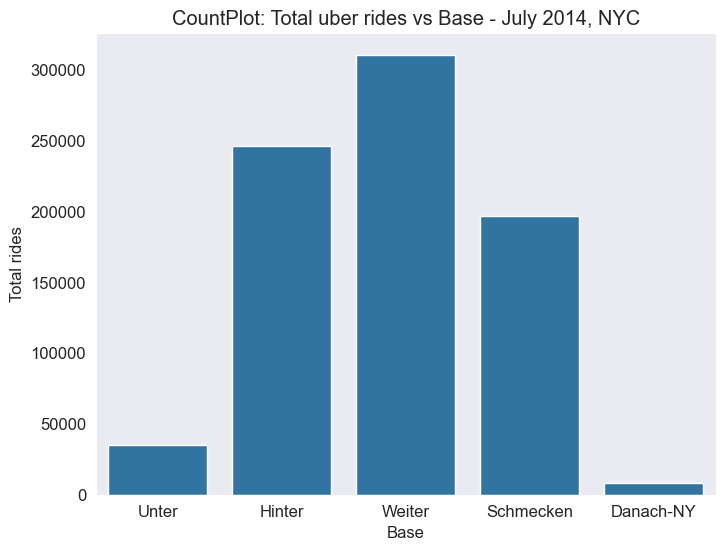

In [32]:
# Count plot of Base
plt.figure(figsize=(8,6))
sns.set_style("dark")
sns.countplot(x=uber_data['Base'].map(BaseMapper))
plt.ylabel('Total rides')
plt.title('CountPlot: Total uber rides vs Base - July 2014, NYC')

#### Observation 5: The above plot tells us that most uber rides originated from Weiter Base and least from Danach-NY. 

#### 5. Finally, let's make one hypothesis and test if it is true by visualizing the data for that case. 

**Hypothesis:** In early morning, weekends have more rides. The reasoning is - People often go out at night during the weekends.

In [33]:
weekends = weekly_data[['Saturday','Sunday']]
weekdays = weekly_data.drop(['Saturday','Sunday'], axis=1)

In [34]:
weekends = weekends.mean(axis=1)
weekdays = weekdays.mean(axis=1)

display(weekends)
display(weekdays)

Time
00:00:00    38.483871
00:15:00    37.774194
00:30:00    34.000000
00:45:00    31.693548
01:00:00    30.225806
              ...    
22:45:00    38.290323
23:00:00    34.629032
23:15:00    31.951613
23:30:00    31.774194
23:45:00    27.419355
Length: 96, dtype: float64

Time
00:00:00    18.232258
00:15:00    15.103226
00:30:00    14.161290
00:45:00    11.548387
01:00:00    10.554839
              ...    
22:45:00    46.632258
23:00:00    42.619355
23:15:00    36.058065
23:30:00    31.838710
23:45:00    28.503226
Length: 96, dtype: float64

In [35]:
weekdays_weekends = pd.concat([weekdays,weekends],axis=1)
weekdays_weekends.columns = ['Weekdays','Weekends']
display(weekdays_weekends)

,Weekdays,Weekends
Time,,
00:00:00,18.232258,38.483871
00:15:00,15.103226,37.774194
00:30:00,14.161290,34.000000
00:45:00,11.548387,31.693548
01:00:00,10.554839,30.225806
...,...,...
22:45:00,46.632258,38.290323
23:00:00,42.619355,34.629032
23:15:00,36.058065,31.951613


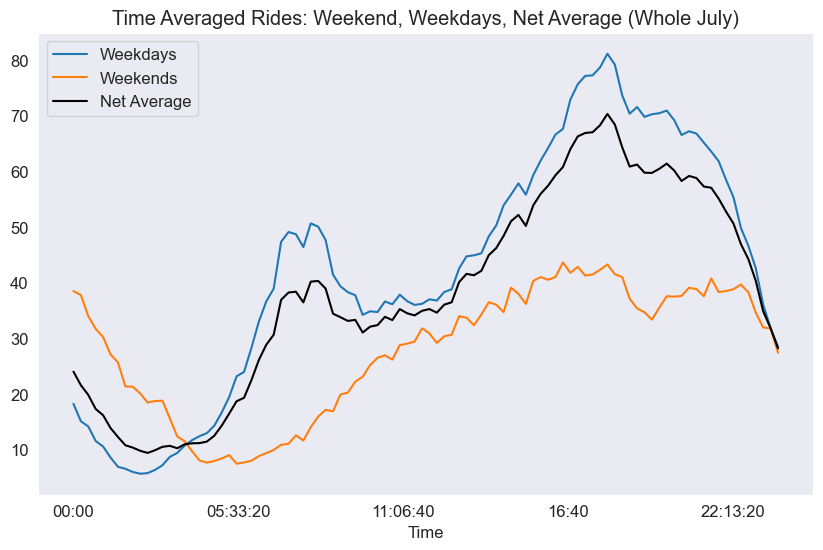

In [36]:
plt.figure(figsize=(10,6))
weekdays_weekends.plot(ax=plt.gca())
weekly_data.T.mean().plot(ax=plt.gca(),c = 'black',label='Net Average')
plt.title('Time Averaged Rides: Weekend, Weekdays, Net Average (Whole July)')
plt.legend()
plt.show()

#### Observation : The plot clearly shows - In early morning, weekends have more rides. This makes sense as people often go out at night during the weekends.

The number of rides around 8 AM is less on weekends, but more on weekdays as it is usually the time when people goto work. Also, in the weekends, there is a surge in the number of evening rides as people return from work.

**With this, we finish our analysis of our Uber Pickups NYC Data.**

<hr>